<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 20px;">Data Cleaning - first iteration</div>


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Import modules</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=RuntimeWarning)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Read data</div>


In [2]:
df = pd.read_csv('data/data_combined.csv')

In [ ]:
df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Dept          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Weekly_Sales  421570 non-null  float64
 5   IsHoliday_x   421570 non-null  bool   
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     150681 non-null  float64
 9   MarkDown2     111248 non-null  float64
 10  MarkDown3     137091 non-null  float64
 11  MarkDown4     134967 non-null  float64
 12  MarkDown5     151432 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  IsHoliday_y   421570 non-null  bool   
 16  Type          421570 non-null  object 
 17  Size          421570 non-null  int64  
dtypes: b

In [5]:
df.shape

(421570, 18)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,421570.0,210784.500000,121696.920829,0.000,105392.250000,210784.50000,316176.750000,421569.000000
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Remove second holiday column and Index as well</div>


In [7]:
# Check whether both holiday columns are equal
are_columns_equal = (df['IsHoliday_x'] == df['IsHoliday_y']).all()

if are_columns_equal:
    print("All values are equal. One holiday column can be removed.")
else:
    print("Not all values are equal. Do not remove column.")

All values are equal. One holiday column can be removed.


In [8]:
df.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)

In [9]:
df.drop(columns=['IsHoliday_y'], inplace=True)

In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Date column to datetime</div>


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Distribution of years</div>


In [12]:
# check how many observations are available per year
year_counts = df['Date'].dt.year.value_counts()

print(year_counts)

Date
2011    153453
2010    140679
2012    127438
Name: count, dtype: int64


In [13]:
# create year column
df['Year'] = df['Date'].dt.year

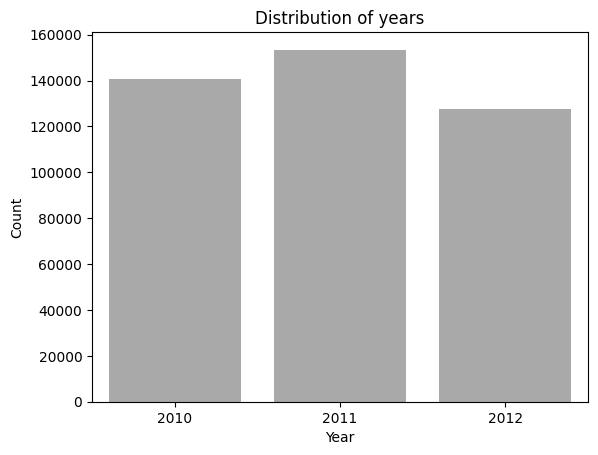

In [14]:
sns.barplot(x=year_counts.index, y=year_counts.values, color='darkgrey')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of years');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">MarkDows - NaNs</div>


In [15]:
null_count_MD1 = df['MarkDown1'].isna().sum()
print("Null count 'null_count_MD1':", null_count_MD1)

null_count_MD2 = df['MarkDown2'].isna().sum()
print("Null count 'null_count_MD2':", null_count_MD2)

null_count_MD3 = df['MarkDown3'].isna().sum()
print("Null count 'null_count_MD3':", null_count_MD3)

null_count_MD4 = df['MarkDown4'].isna().sum()
print("Null count 'null_count_MD4':", null_count_MD4)

null_count_MD5 = df['MarkDown5'].isna().sum()
print("Null count 'null_count_MD5':", null_count_MD5)

Null count 'null_count_MD1': 270889
Null count 'null_count_MD2': 310322
Null count 'null_count_MD3': 284479
Null count 'null_count_MD4': 286603
Null count 'null_count_MD5': 270138


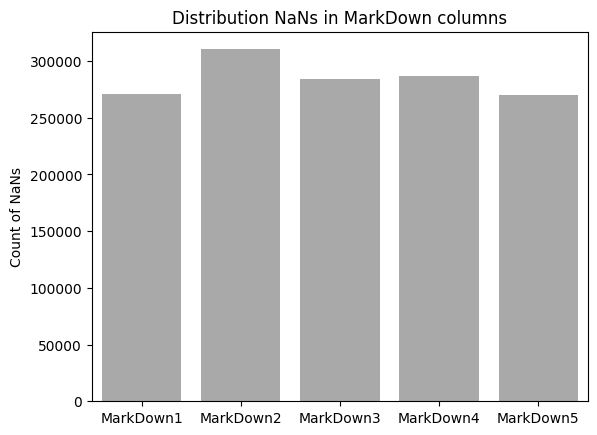

In [16]:
sns.barplot(x=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], 
            y=[null_count_MD1, null_count_MD2, null_count_MD3, null_count_MD4, null_count_MD5], 
            color='darkgrey')
plt.xlabel('')
plt.ylabel('Count of NaNs')
plt.title('Distribution NaNs in MarkDown columns');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">MarkDowns - Values</div>


In [17]:
not_null_count_MD1 = df['MarkDown1'].notna().sum()
print("Not null count 'not_null_count_MD1':", not_null_count_MD1)

not_null_count_MD2 = df['MarkDown2'].notna().sum()
print("Not null count 'not_null_count_MD2':", not_null_count_MD2)

not_null_count_MD3 = df['MarkDown3'].notna().sum()
print("Not null count 'not_null_count_MD3':", not_null_count_MD3)

not_null_count_MD4 = df['MarkDown4'].notna().sum()
print("Not null count 'not_null_count_MD4':", not_null_count_MD4)

not_null_count_MD5 = df['MarkDown5'].notna().sum()
print("Not null count 'not_null_count_MD5':", not_null_count_MD5)


Not null count 'not_null_count_MD1': 150681
Not null count 'not_null_count_MD2': 111248
Not null count 'not_null_count_MD3': 137091
Not null count 'not_null_count_MD4': 134967
Not null count 'not_null_count_MD5': 151432


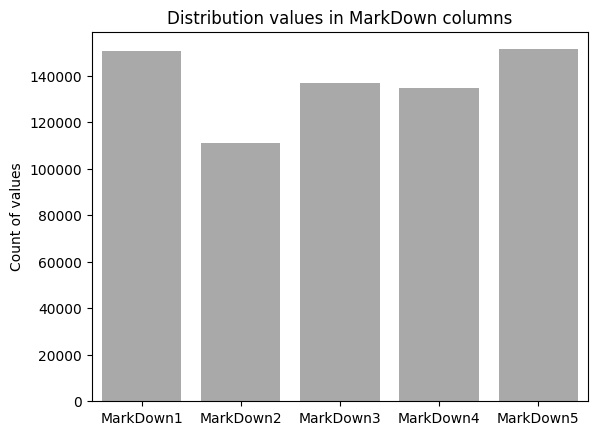

In [18]:
sns.barplot(x=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], 
            y=[not_null_count_MD1, not_null_count_MD2, not_null_count_MD3, not_null_count_MD4, not_null_count_MD5],
            color='darkgrey')
plt.xlabel('')
plt.ylabel('Count of values')
plt.title('Distribution values in MarkDown columns');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">MarkDowns - Values by years</div>


In [19]:
not_null_count_MD1_by_year = df.groupby('Year')['MarkDown1'].apply(lambda x: x.notna().sum())
print("Not null count 'not_null_count_MD1_by_year':", not_null_count_MD1_by_year)

not_null_count_MD2_by_year = df.groupby('Year')['MarkDown2'].apply(lambda x: x.notna().sum())
print("Not null count 'not_null_count_MD2_by_year':", not_null_count_MD2_by_year)

not_null_count_MD3_by_year = df.groupby('Year')['MarkDown3'].apply(lambda x: x.notna().sum())
print("Not null count 'not_null_count_MD3_by_year':", not_null_count_MD3_by_year)

not_null_count_MD4_by_year = df.groupby('Year')['MarkDown4'].apply(lambda x: x.notna().sum())
print("Not null count 'not_null_count_MD4_by_year':", not_null_count_MD4_by_year)

not_null_count_MD5_by_year = df.groupby('Year')['MarkDown5'].apply(lambda x: x.notna().sum())
print("Not null count 'not_null_count_MD5_by_year':", not_null_count_MD5_by_year)

Not null count 'not_null_count_MD1_by_year': Year
2010         0
2011     23700
2012    126981
Name: MarkDown1, dtype: int64
Not null count 'not_null_count_MD2_by_year': Year
2010        0
2011    20154
2012    91094
Name: MarkDown2, dtype: int64
Not null count 'not_null_count_MD3_by_year': Year
2010         0
2011     23116
2012    113975
Name: MarkDown3, dtype: int64
Not null count 'not_null_count_MD4_by_year': Year
2010         0
2011     21042
2012    113925
Name: MarkDown4, dtype: int64
Not null count 'not_null_count_MD5_by_year': Year
2010         0
2011     23994
2012    127438
Name: MarkDown5, dtype: int64


There are many NaNs in the MarkDown colums. As time is limited, they will be removed for the first iterations going through the data lifecycle, to gain results. We will come back to this or add it to future work.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Checking for duplicates:</div>


In [20]:
dupl = df.duplicated().sum()
print('Number of duplicates:', dupl)

Number of duplicates: 0


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Convert Fahrenheit to Celcius</div>


In [21]:
#creating a function for converting Fahrenheit to Celcius
def fahr_to_celsius(Temperature):
    
    """Convert Fahrenheit to Celsius
    Return Celsius conversion of input"""

    temp_celsius = (Temperature - 32) * 5 / 9
    return temp_celsius

In [22]:
# Creating a new column Temp_Celcius
Temp_Celcius = fahr_to_celsius(df['Temperature']).round(2)
Temp_Celcius

0          5.73
1          3.62
2          4.41
3          8.13
4          8.06
          ...  
421565    18.27
421566    18.27
421567    12.48
421568    13.59
421569    14.92
Name: Temperature, Length: 421570, dtype: float64

In [23]:
# Insert new temperature column to dataframe
df['Temp_Celsius'] = Temp_Celcius

In [24]:
# dropping Fahrenheit column
df.drop(columns=['Temperature'], inplace=True)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Checking if all store / dept / date combinations are unique</div>


In [25]:
df['store_dept_date'] = df['Store'].astype(str) + '_' + df['Dept'].astype(str) + '_' + df['Date'].astype(str)
df['store_dept_date'].count() == df['store_dept_date'].nunique()

True

In [26]:
# drop column, because we don't need it for further calculation
df.drop(columns=['store_dept_date'], inplace=True)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Creating calendar week feature</div>


In [27]:
df['Calendar_Week'] = df['Date'].dt.strftime('%Y-%U')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Safe file after first iteration of data cleaning</div>


In [28]:
df.to_pickle('data/data_combined_clean.pkl')

<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 20px;">Data Cleaning - second iteration</div>


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Reading file and dropping columns:</div><br>

As seen above, there are too many values missing for markdown columns. 
The calender week feature is not needed any more.

In [29]:
df = pd.read_pickle('data/data_combined_clean.pkl')
df.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Calendar_Week'], 
        inplace=True)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Now dropping all store-department-combinations with less than 143 dates/weekly sales:</div><br>

The EDA has shown that for each unique shop-department combination, 143 weekly sales must be available for the data to be complete. Since we are working with time series and the values are missing without a pattern, filling the gaps seems difficult and not feasible in the given time frame. Therefore the following way.

In [30]:
# create list with all dates
date_lst = df.query('Store == 1 and Dept ==1')['Date'].to_list()

#count unique dates for each combination of store and date
grouped_counts = df.groupby(['Store', 'Dept'])['Date'].nunique()

# getting index for those with less than 143
to_delete = grouped_counts[grouped_counts < 143].index

# delete lines with less than 143
df = df[~df.set_index(['Store', 'Dept']).index.isin(to_delete)]

df.shape

(380380, 12)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">All departments have 143 weekly sales now:</div>

In [31]:
grouped_counts = df.groupby(['Store', 'Dept']).size().reset_index(name='Anzahl_KW_vorhanden')
grouped_counts_df = pd.DataFrame(grouped_counts)

<Figure size 1200x2400 with 0 Axes>

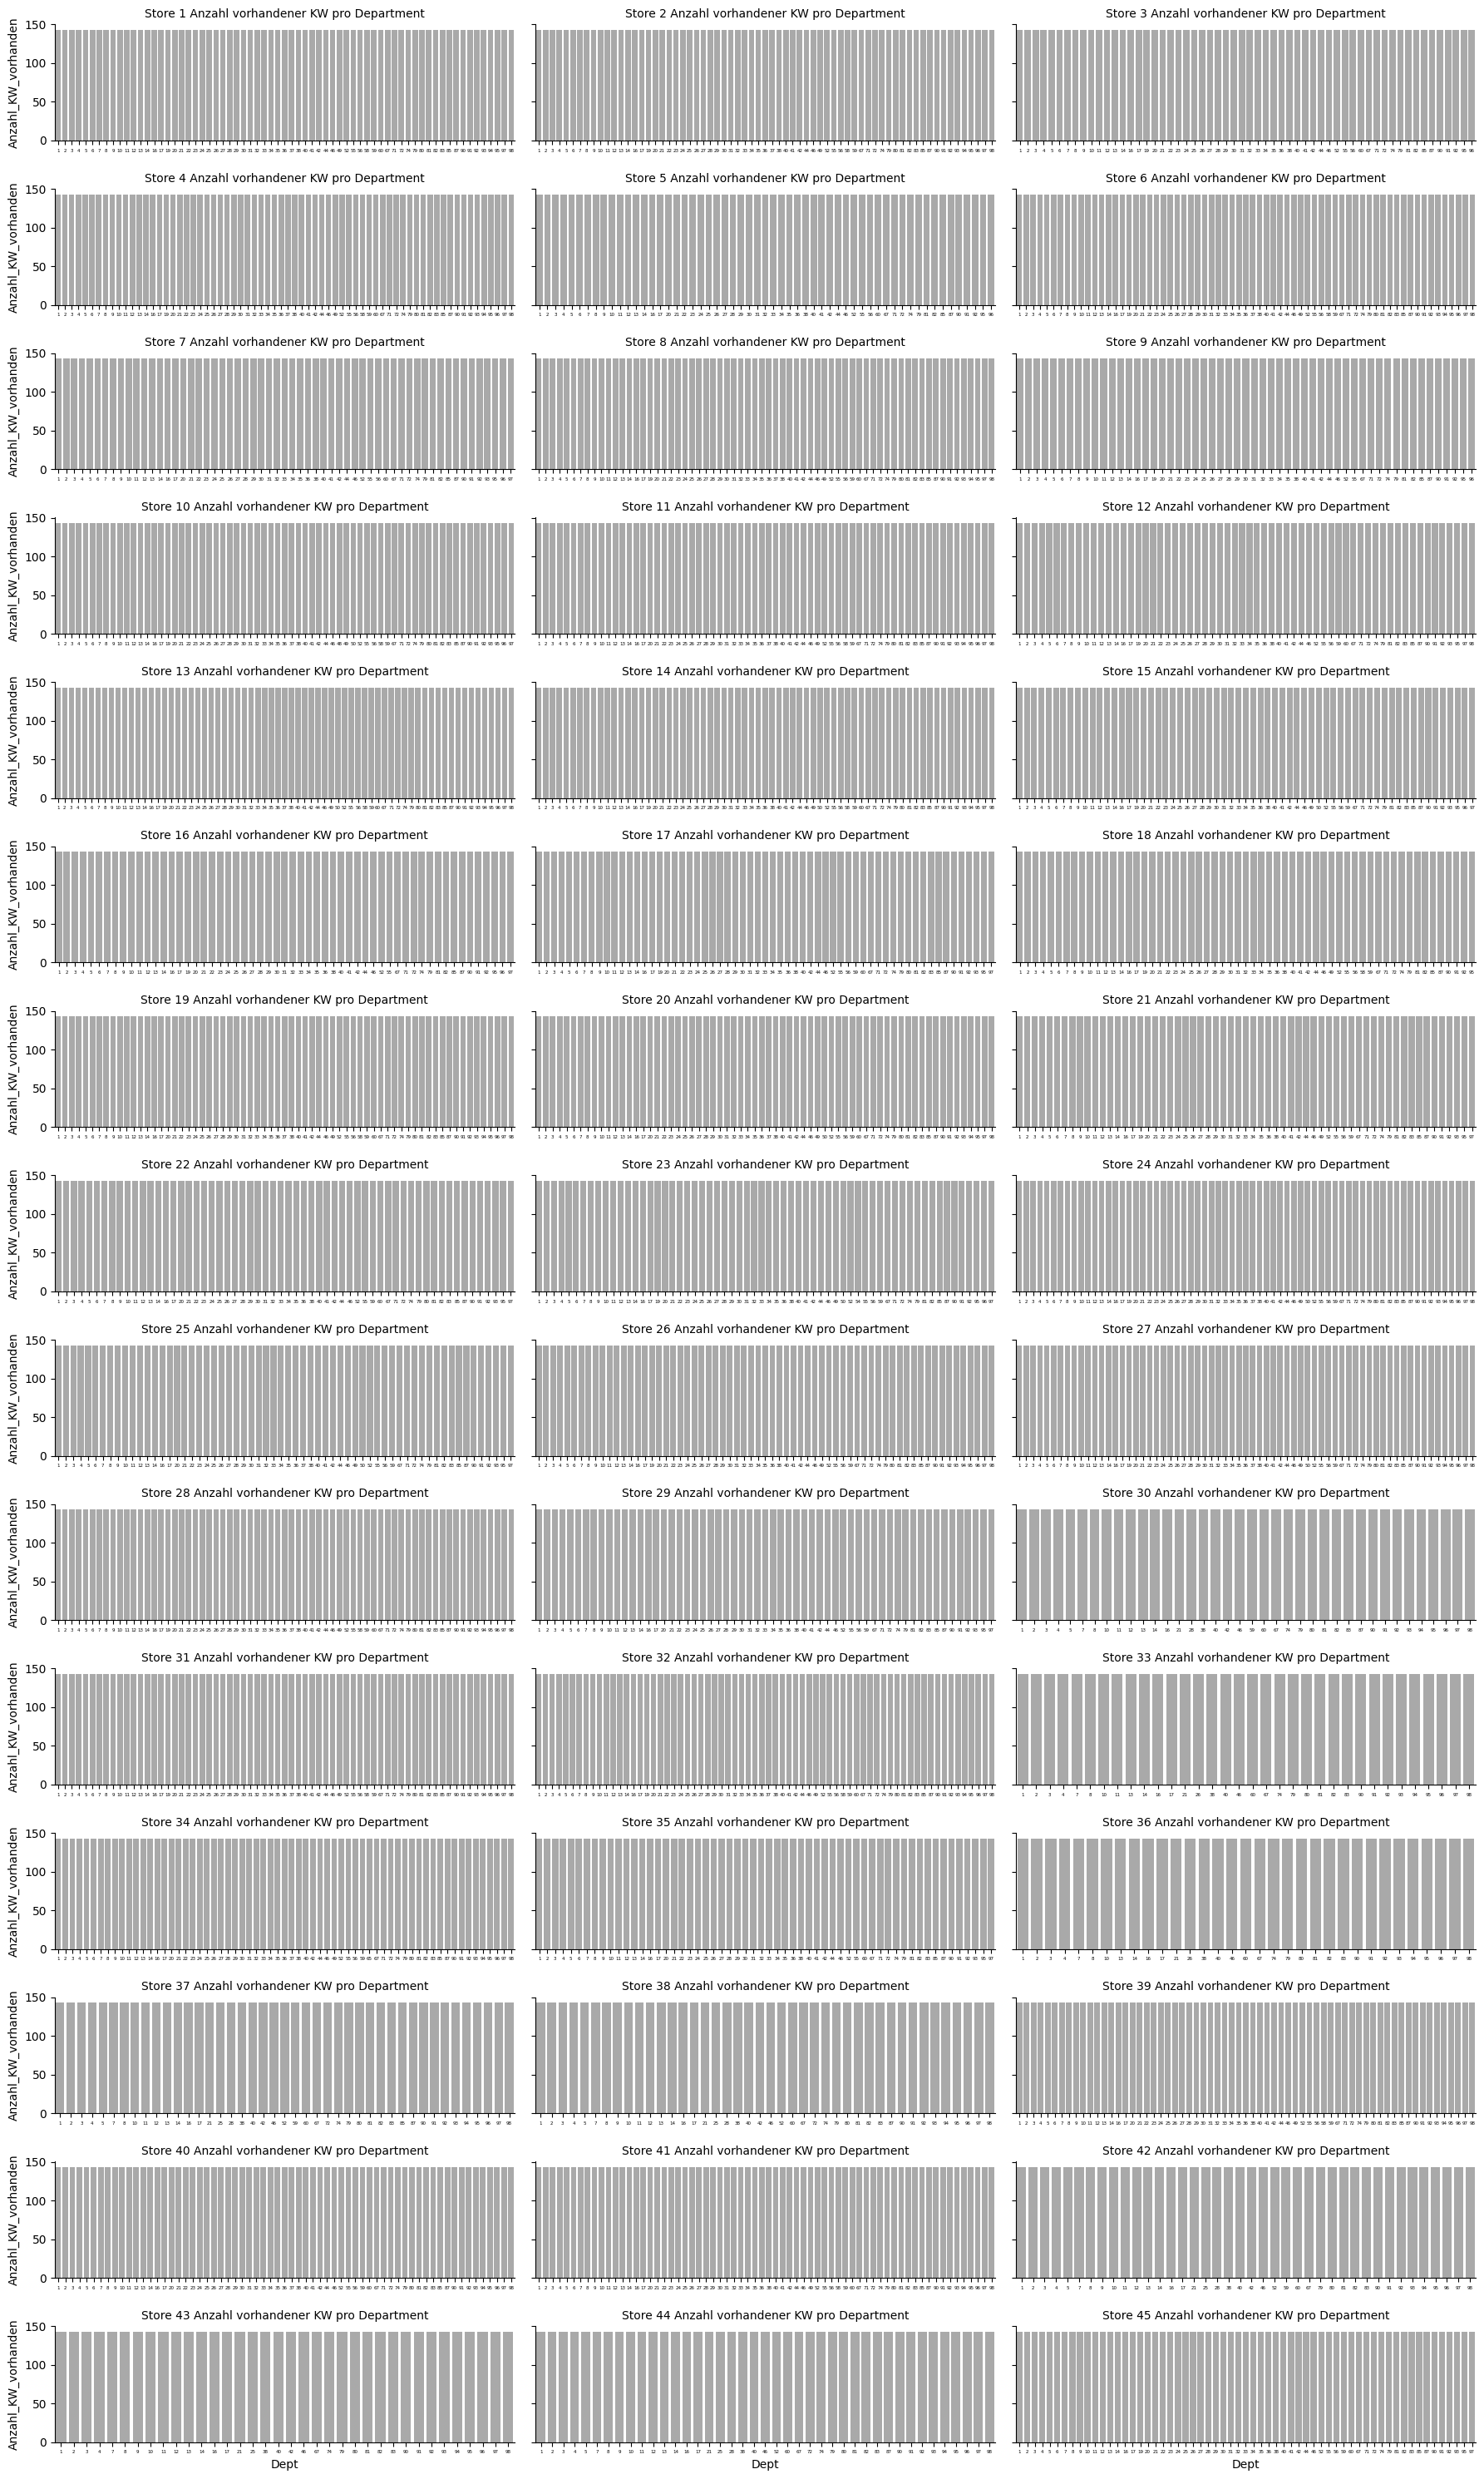

In [32]:
plt.figure(figsize=(12, 24))

colors=['darkgrey']

g = sns.FacetGrid(grouped_counts_df, col="Store", col_wrap=3, height=2, aspect=3, sharex=False, sharey=True)
g.map(sns.barplot, "Dept", "Anzahl_KW_vorhanden", palette=colors)
g.set_titles("Store {col_name} Anzahl vorhandener KW pro Department", fontsize=10)
g.set_xticklabels(fontsize=4, rotation=0);

Everything looks fine.<br>
<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Next safing new file.</div>

In [33]:
df.to_pickle('data/data_combined_clean_2.pkl')